# Difference in Complaints Between Urbana and Chicago

### Dengjiu Zhao

In [1]:
import bqplot
import numpy as np
import pandas as pd 
import ipywidgets
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# The main dataset is from "https://data.illinois.gov/". And the URL is "https://data.illinois.gov/dataset/3513d0bd-70e6-45e8-98f9-abc5658a1f49/resource/0d3316f1-756d-4720-847c-41dfa6b1b5cf/download/nuisance-data-for-upload.csv_20191226.csv".

In [3]:
nuisance = pd.read_csv('https://data.illinois.gov/dataset/3513d0bd-70e6-45e8-98f9-abc5658a1f49/resource/0d3316f1-756d-4720-847c-41dfa6b1b5cf/download/nuisance-data-for-upload.csv_20191226.csv')
nuisance = nuisance.dropna()

In [4]:
A = np.array(nuisance['Type of Complaint'])
B = np.array(nuisance['Method Submitted'])
C = np.array(nuisance['Total Fees'])
D = np.array(nuisance['Year Reported'])

df = pd.DataFrame({'Type of Complaint':A, 'Method Submitted':B, 'Total Fees':C})
df2 = pd.DataFrame({'Year Reported':D, 'Total Fees':C})

table = pd.pivot_table(df, values=['Total Fees'], index=['Method Submitted'], columns = ['Type of Complaint'], aggfunc=np.mean, fill_value=0)
table2 = pd.pivot_table(df2, values=['Total Fees'], index=['Year Reported'], aggfunc=np.sum, fill_value=0)

aname = table.columns.levels[1].to_list()

In [5]:
####### GRID HEAT MAP #######
# scales
col_sc = bqplot.ColorScale(scheme='Reds')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Type of Complaint')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Method Submitted')

# marks
heat_map = bqplot.GridHeatMap(color=table.values,
                              row=table.index,
                              column=aname, 
                              scales={'color':col_sc,'row':y_sc, 'column':x_sc},
                              interactions={'click':'select'},
                              selected_style={'fill':'blue'})

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax,x_ax, y_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(label='Typ…

In [6]:
myLabel = ipywidgets.Label()

In [7]:
####### BAR PLOT #######
# scales
x_scb = bqplot.LinearScale()
y_scb = bqplot.LinearScale()

# axis 
x_axb = bqplot.Axis(label='Year Reported', scale=x_scb)
y_axb = bqplot.Axis(label='Total Fees', scale=y_scb, orientation='vertical')

In [8]:
footage, footage_edges = np.histogram(table2.index.values, 
                                      weights=table2['Total Fees'].values, bins=10) 

In [9]:
footage_centers = (footage_edges[:-1] + footage_edges[1:])/2

In [10]:
footage_hist = bqplot.Bars(x=footage_centers, y=footage, scales={'x':x_scb, 'y':y_scb},padding=0.05)

In [11]:
fig_bars = bqplot.Figure(marks=[footage_hist],axes=[x_axb, y_axb])

fig_bars

Figure(axes=[Axis(label='Year Reported', scale=LinearScale()), Axis(label='Total Fees', orientation='vertical'…

In [12]:
def on_selection(change):
    i,j = change['owner'].selected[0]
    v = table.values[i,j]
    myLabel.value = 'Mean of Total Fees' + str(v)
    
    mask = (nuisance['Method Submitted'] == table.index[i]) & \
            (nuisance['Type of Complaint'] == table.columns.levels[1][j])
    
    # grab nuisance subset dataframe
    nuisance_subset = nuisance[mask]
    
    # grab years and fees from pandas
    grouped = nuisance_subset.groupby("Year Reported")["Total Fees"].sum()
    years = grouped.index
    fees = grouped.values
    footage_hist.x = years
    footage_hist.y = fees
    
heat_map.observe(on_selection,'selected')

In [13]:
bins_slider = ipywidgets.FloatSlider(min=0,max=1,step=0.01,value=0.05)
ipywidgets.jslink((bins_slider,'value'), (footage_hist,'padding'))

Link(source=(FloatSlider(value=0.05, max=1.0, step=0.01), 'value'), target=(Bars(colors=['steelblue'], interac…

In [14]:
controls = ipywidgets.HBox([myLabel, bins_slider])
figures = ipywidgets.HBox([fig,fig_bars])
fig.layout.min_width='500px'
fig_bars.layout.min_width='500px'
dashboard = ipywidgets.VBox([controls,figures])

## An Interactive Visualization Based on the Urbana Complaints Dataset

In [15]:
dashboard

## Contextual Visualizations

In [16]:
from IPython.display import Image

In [17]:
# The following image was cited from "https://fivethirtyeight.com/features/how-to-predict-which-chicago-cops-will-commit-misconduct/".

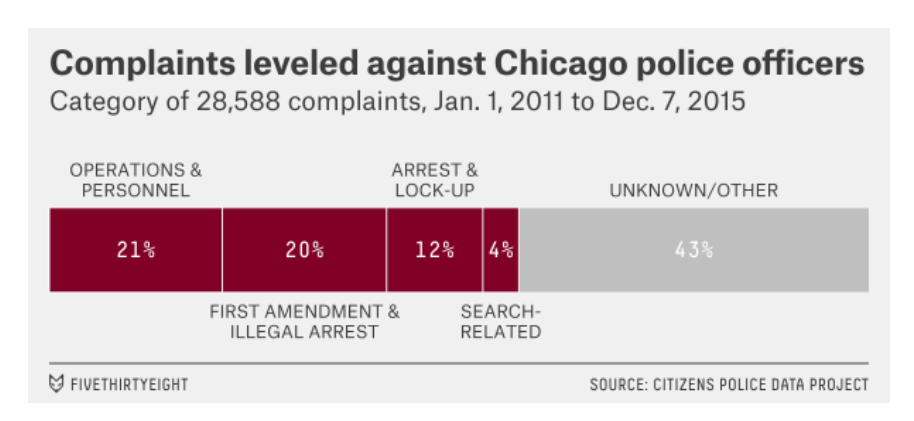

In [18]:
contextual_viz1 = Image(filename='chicago_police_complaints.png')
contextual_viz1 

In [19]:
# The following image was cited from "https://www.renthop.com/studies/boston/rodent-complaints-2021#chicago".

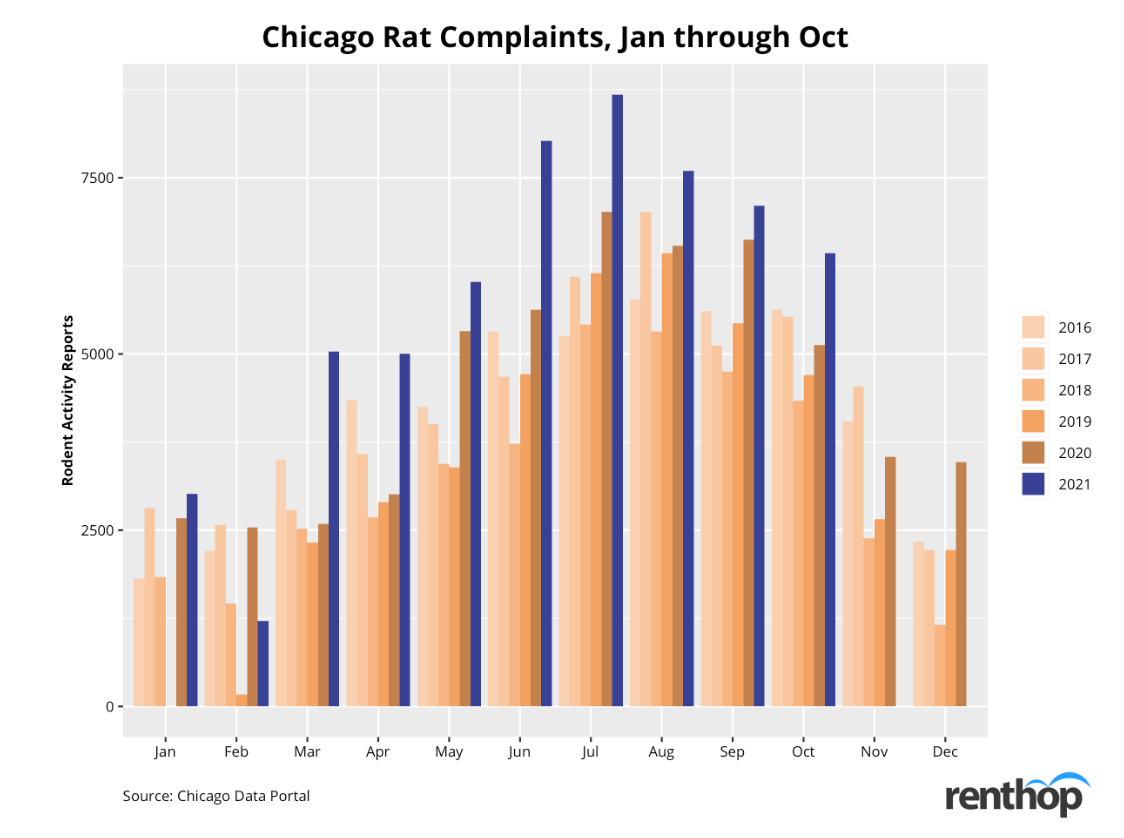

In [20]:
contextual_viz2 = Image(filename='chicago_rat_complaints.png')
contextual_viz2 

## Description of the Visualizations

For the first interactive visualization, there are two plots linked to each other. The left component is a heatmap, whose columns are "Type of Complaint", rows are "Method Submitted", and values are mean of total fine fees for that set of criteria. The right component is a bar plot, whose x-axis is "Year Reported", and y-axis is total fine fees of that year. Besides, there is a slider above, which can let users adjust the bin width of the bar plot by themselves. Since the two plots are linked, the bar plot will update automatically once you select a cell in the heatmap. And the function of this interactive visualization is that it will be helpful to know the corresponding total fine fees of a specific year once you have decided the type of the complaint and the methods submitted.

The first contextual visualization is about complaints against Chicago police officers from 2011 to 2015. From the source of this visualization, we can know that this far-reaching dataset, a product of the nonprofit Invisible Institute’s Citizens Police Data Project, comprehensively covers nearly five years of complaints against Chicago police officers. Each of the 28,588 records in the database offers a detailed account of the incident, including information on the accused officer, the complainant, the type of alleged misconduct, and whether the complaint was found legitimate by an internal investigation.
The data is broken into subcategories depending on the specific allegation, but this visualization displays the most common types of complaints.

The second contextual visualization is about Chicago rat complaints from 2016 to 2021. From the source of this visualization, we can know that Chicago ranked No.1 as the “rat capital” in the country last year. July 2021 marked the worst month since 2016, with a total of 8,679 rat sightings reported to the city’s 311 system, 23.7% higher than July 2020. The number continued trending upward throughout the fall, with 6,428 rat sighting complaints logged in October 2021, which is over 200 complaints per day.